<a href="https://colab.research.google.com/github/vigneshwarjayabal/NLP/blob/main/Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**What is Topic Modeling?**

- Topic modeling is an unsupervised machine learning technique used in Natural Language Processing (NLP) to identify hidden themes or topics in a collection of documents. It helps in discovering patterns in large text datasets without human labeling.


- 💡 Think of it like this:
Imagine you have thousands of articles but don’t know what they are about. Topic modeling automatically groups them into topics such as sports, politics, technology, health, etc., without any prior knowledge.

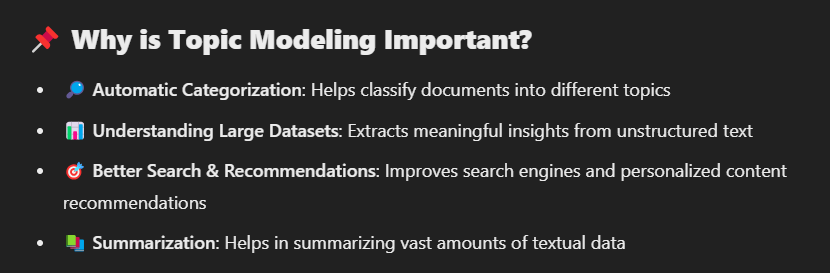

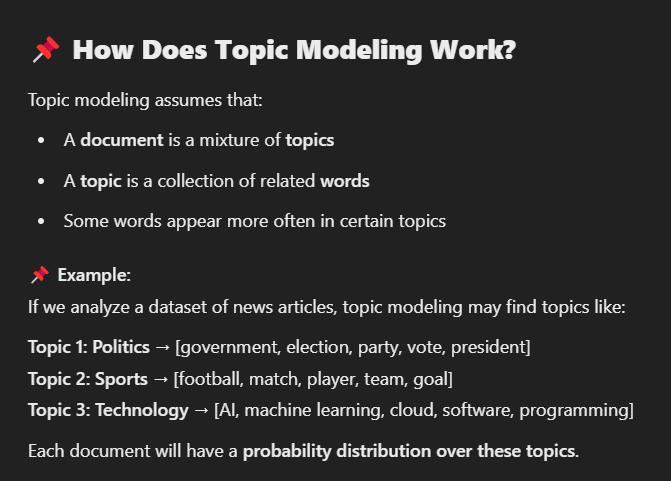

#**📌 Types of Topic Modeling Algorithms**

#**1️⃣ Latent Dirichlet Allocation (LDA)**

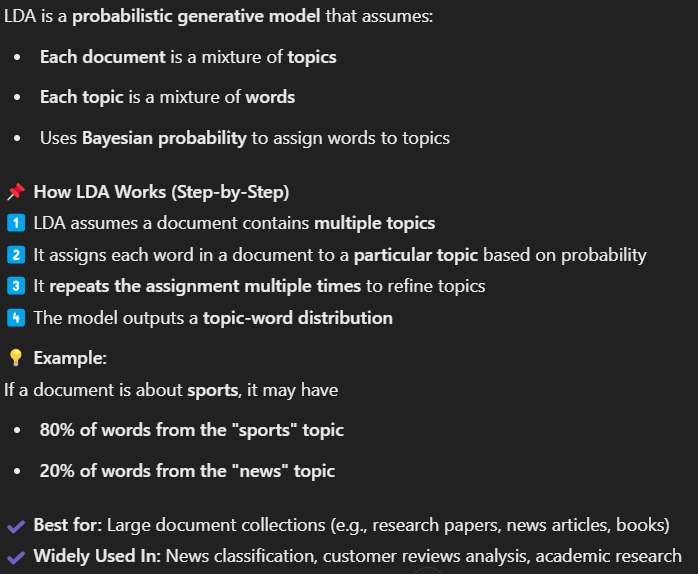

#**2️⃣ Latent Semantic Analysis (LSA)**

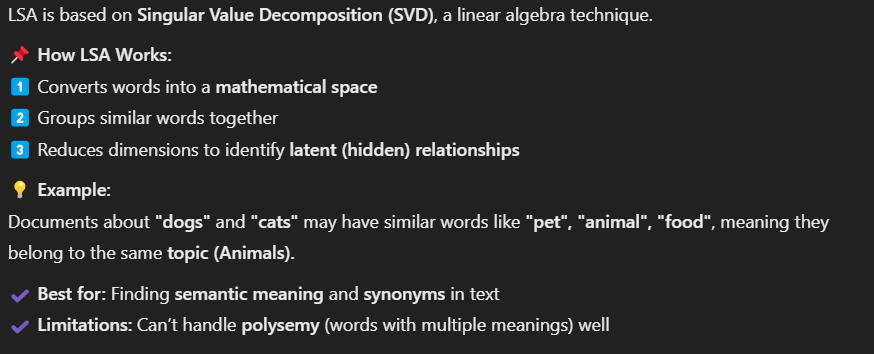

#**3️⃣ Non-Negative Matrix Factorization (NMF)**

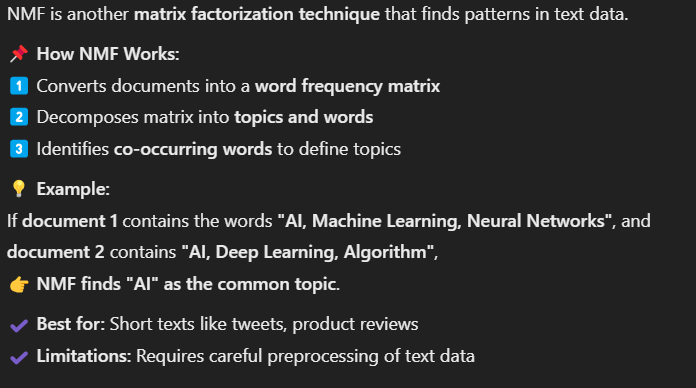

#**📌 Topic Modeling Implementation in Python (LDA Example)**

In [6]:
import spacy
import gensim
from gensim import corpora
from gensim.models import LdaModel

# Load spaCy English NLP model
nlp = spacy.load("en_core_web_sm")

# Sample text documents
documents = [
    "Artificial Intelligence is transforming the world with automation.",
    "Deep Learning and Neural Networks are subsets of Machine Learning.",
    "Natural Language Processing (NLP) helps computers understand human language.",
    "Self-driving cars rely on AI and computer vision for navigation.",
    "Chatbots use NLP and Machine Learning for better customer support."
]

# 🔹 Step 1: Preprocess the Text using spaCy
def preprocess_text(doc):
    processed_tokens = []
    spacy_doc = nlp(doc)  # Process text with spaCy
    for token in spacy_doc:
        if not token.is_stop and not token.is_punct and token.is_alpha:
            processed_tokens.append(token.lemma_.lower())  # Lemmatization & Lowercasing
    return processed_tokens

# Apply preprocessing to all documents
processed_docs = [preprocess_text(doc) for doc in documents]

# 🔹 Step 2: Convert text into a Dictionary and Bag-of-Words representation
dictionary = corpora.Dictionary(processed_docs)  # Create dictionary
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]  # Convert to BoW

# 🔹 Step 3: Train LDA Model
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10)

# 🔹 Step 4: Print Topics
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx + 1}: {topic}")


Topic 1: 0.073*"machine" + 0.073*"learning" + 0.073*"nlp" + 0.073*"customer" + 0.073*"well" + 0.072*"use" + 0.072*"chatbot" + 0.072*"support" + 0.018*"subset" + 0.018*"deep"
Topic 2: 0.068*"language" + 0.068*"computer" + 0.068*"learning" + 0.039*"help" + 0.039*"natural" + 0.039*"processing" + 0.039*"understand" + 0.039*"human" + 0.039*"rely" + 0.039*"car"
Topic 3: 0.087*"artificial" + 0.087*"transform" + 0.087*"intelligence" + 0.087*"world" + 0.087*"automation" + 0.022*"nlp" + 0.022*"learning" + 0.022*"machine" + 0.022*"support" + 0.022*"chatbot"


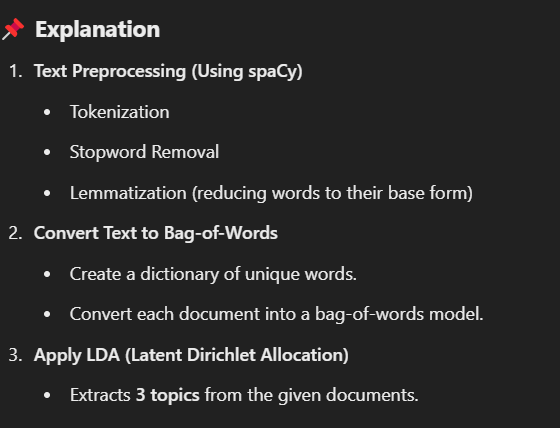